In [1]:
import pandas as pd
import numpy as np

sains=pd.read_json('sainsburys.json')#read the document

/Users/guliyang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/guliyang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sains.info() #see the information of table, especially the number of data

<class 'pandas.core.frame.DataFrame'>
Index: 82821 entries, 0 to 82820
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 82821 non-null  datetime64[ns]
 1   id                         82821 non-null  int64         
 2   id_str                     82821 non-null  int64         
 3   text                       82821 non-null  object        
 4   display_text_range         45732 non-null  object        
 5   source                     82820 non-null  object        
 6   truncated                  82821 non-null  bool          
 7   in_reply_to_status_id      40277 non-null  float64       
 8   in_reply_to_status_id_str  40277 non-null  float64       
 9   in_reply_to_user_id        49755 non-null  float64       
 10  in_reply_to_user_id_str    49755 non-null  float64       
 11  in_reply_to_screen_name    48705 non-null  object        
 12  user     

In [3]:
sains['extended_tweet'].head() #see the format of 'extended_tweet' variables

0                                                 None
1    {'full_text': '@ocado @tesco @sainsburys @asda...
2                                                 None
3                                                 None
4    {'full_text': "@lordrix @sainsburys But Sainsb...
Name: extended_tweet, dtype: object

In [4]:
#extract full text from 'extended_tweet'
sains['full_text'] = [x.split(",")[0].split(":")[1][2:] if x!=None else None for x in sains['extended_tweet']]

In [5]:
#combine the content from 'extended_tweet' and 'text' to have reak full text
sains['full_text'] = [y if x==None else x for x,y in zip(sains['full_text'],sains['text'])]

In [6]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

/Users/guliyang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guliyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
sains['full_text'] = sains['full_text'].apply(lambda x: remove_URLs(x))

In [9]:
# Remove Email
def remove_email(text):
    return re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
sains['full_text'] = sains['full_text'].apply(lambda x: remove_email(x))

In [10]:
#Remove @ sign
def remove_atsign(text):
    return re.sub(r'@\w+\b', '', text)
sains['full_text'] = sains['full_text'].apply(lambda x: remove_atsign(x))

In [11]:
sains['full_text'].head()

0    RT : Today we collected some food donated by s...
1          It is time you all worked together to ge...
2    RT : Dear panic buyers\n\nPlease use what huma...
3            Can’t wait to see what  brings me today 🙈
4      But Sainsbury's have made a 'Big' thing on t...
Name: full_text, dtype: object

In [12]:
# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&+*=!-]"," ",data)
sains['full_text']= sains['full_text'].apply(lambda x: remove_punctuations(x))

In [13]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
sains['full_text'] = sains['full_text'].apply(lambda x: remove_numbers(x))

In [14]:
# convert text to lower cases
def to_lower(text):
    return text.lower()
sains['full_text']=sains['full_text'].apply(lambda x:to_lower(x))

In [15]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ["all", "due", "to", "on", "daily","rt",'amp','https','tesco','sainsbury','store','one','need']
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
sains['full_text'] = sains['full_text'].apply(lambda text: cleaning_stopwords(text))
sains['full_text'].head()

0    today collected food donated shoppers branch a...
1    time worked together get list vulnerable peopl...
2    dear panic buyers please use humanity left lea...
3                        can’t wait see brings today 🙈
4    sainsbury's made 'big' thing website help vuln...
Name: full_text, dtype: object

In [16]:
#stemming text
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
sains['full_text']= sains['full_text'].apply(lambda x: stemming_on_text(x))

In [17]:
#lemmatizing text
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
sains['full_text'] = sains['full_text'].apply(lambda x: lemmatizer_on_text(x))

In [18]:
sains['full_text'].head()

0    today collected food donated shoppers branch a...
1    time worked together get list vulnerable peopl...
2    dear panic buyers please use humanity left lea...
3                        can’t wait see brings today 🙈
4    sainsbury's made 'big' thing website help vuln...
Name: full_text, dtype: object

In [19]:
df=sains.copy()

In [20]:
#since some tweets are repetitive and meaningless, removing them from data
df=df.drop_duplicates(subset=['full_text'])

In [21]:
#extract date from 'created_at'
df['time']=pd.to_datetime(df['created_at'].apply(lambda x: x.date()))

In [22]:
from wordcloud import WordCloud

In [23]:
df1=df.groupby('time')['full_text'].count()

In [24]:
df1.to_excel('number of tweets.xlsx')# export it to excel to be used in Tableau

/var/folders/4k/zlxq_x0j20l2h_h63bk5wskm0000gn/T/ipykernel_39403/1598714148.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df1.to_excel('number of tweets.xlsx')# export it to excel to be used in Tableau


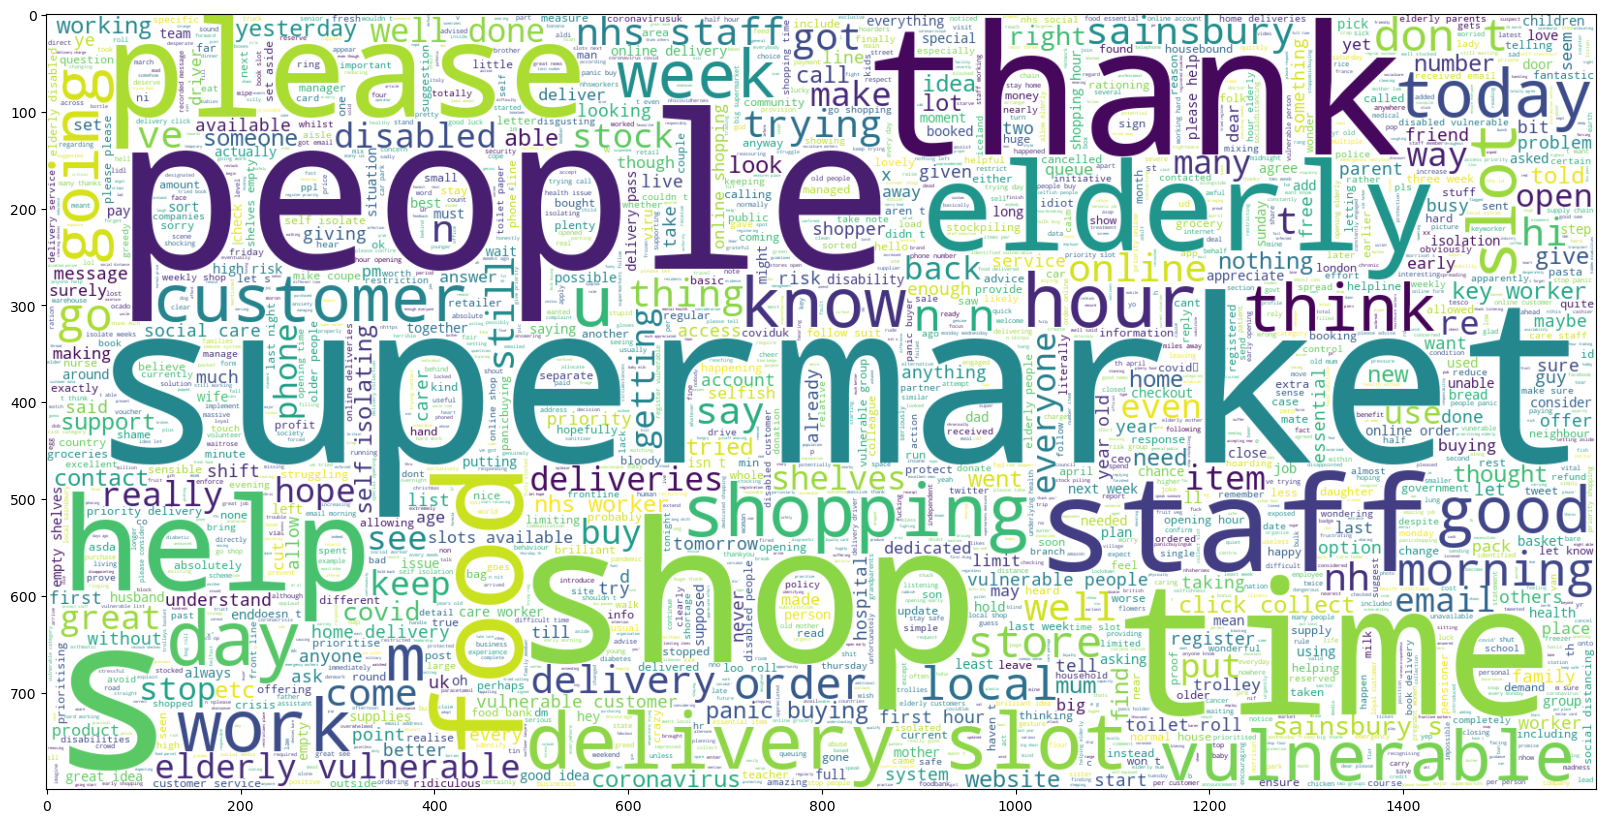

In [27]:
#find the most popular words on 2020-03-23
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[(df['time'] >= '2020-03-15') & (df['time'] <= '2020-03-23')].full_text))
plt.imshow(wc , interpolation = 'bilinear')

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/guliyang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
#score the full_text
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

df.loc[:,'scores'] = df['full_text'].apply(calculate_sentiment)
df[['full_text','scores']].head()

full_text  scores
0  today collected food donated shoppers branch a...  0.0000
1  time worked together get list vulnerable peopl...  0.4939
2  dear panic buyers please use humanity left lea...  0.1027
3                      can’t wait see brings today 🙈  0.0000
4  sainsbury's made 'big' thing website help vuln...  0.2023

In [30]:
#classify the full text to three different sentiments according to scores
def sentiment_cat(x):
    if x>=0.3:
        return 'positive'
    elif x<= -0.3:
        return 'negative'
    else:
        return'neutral'
    
df['sentiment']=df['scores'].apply(lambda x:sentiment_cat(x))

In [31]:
df[['full_text','scores','sentiment']].head(10)

full_text  scores sentiment
0  today collected food donated shoppers branch a...  0.0000   neutral
1  time worked together get list vulnerable peopl...  0.4939  positive
2  dear panic buyers please use humanity left lea...  0.1027   neutral
3                      can’t wait see brings today 🙈  0.0000   neutral
4  sainsbury's made 'big' thing website help vuln...  0.2023   neutral
5            signed open letter asking join protect…  0.2960   neutral
6  bought tin shortbread worst i've ever needed s... -0.6249  negative
7  thank reply form already completed last week w...  0.3612  positive
8  hindsight wonderful thing blame idiots oversto...  0.3182  positive
9      number every customer uses always used wonder  0.0772   neutral

/Users/guliyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guliyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guliyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/guliyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupi

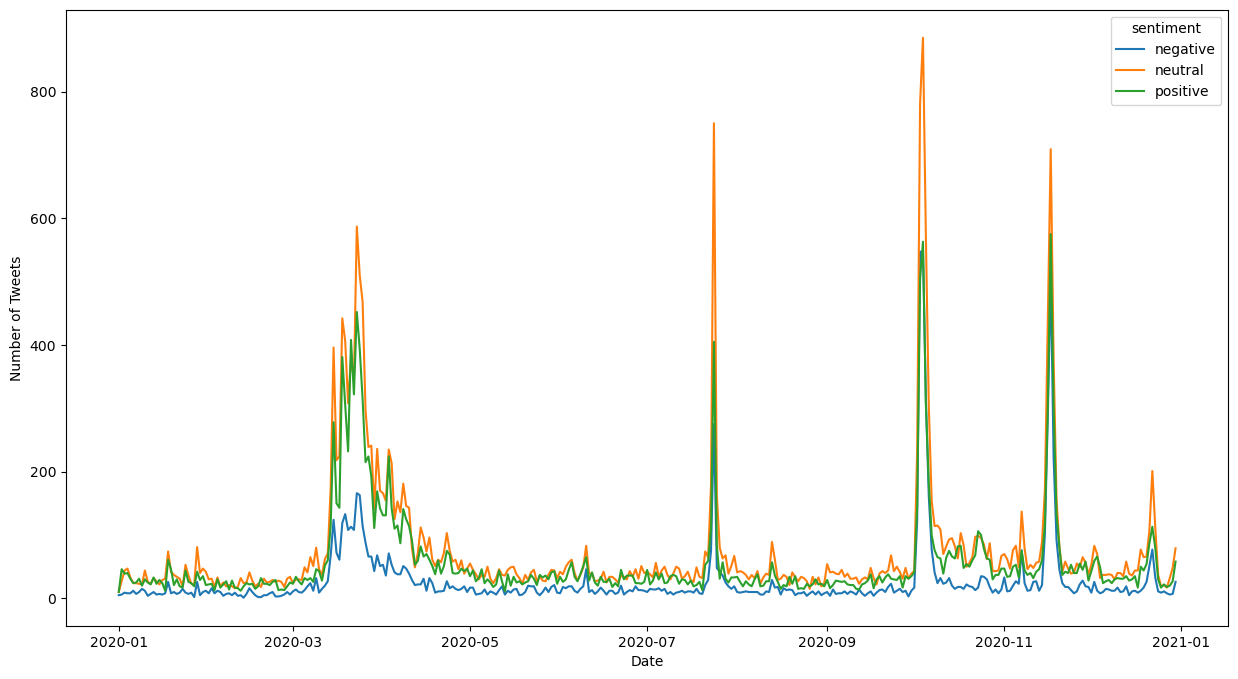

In [35]:
#Number of tweets expressing three different sentiments over time
import seaborn as sns
df2=df.groupby(['sentiment','time'])['full_text'].count().reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df2,x='time',y='full_text',hue='sentiment')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

/Users/guliyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='scores', ylabel='Count'>

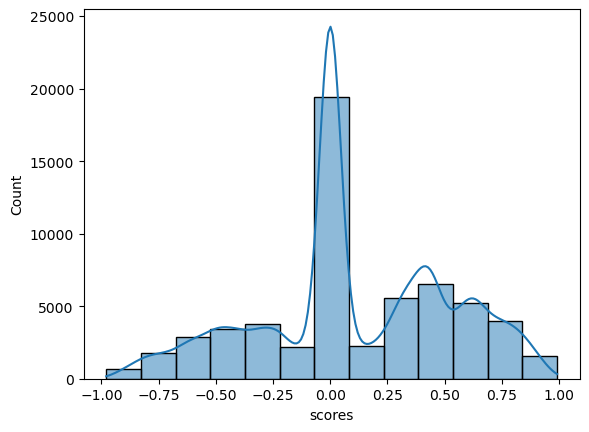

In [32]:
# sentiment scores distribution
import seaborn as sns
sns.histplot(data=df,x='scores',bins=13,kde=True)

[Text(0, 0, '28068'), Text(0, 0, '21068'), Text(0, 0, '10098')]

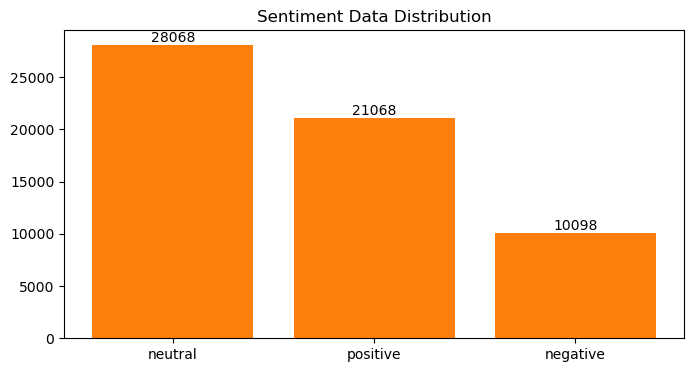

In [33]:
# sentiment data distribution
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

bar_container = plt.bar(val_count.index, val_count.values)
plt.bar_label(bar_container)

In [34]:
from wordcloud import WordCloud

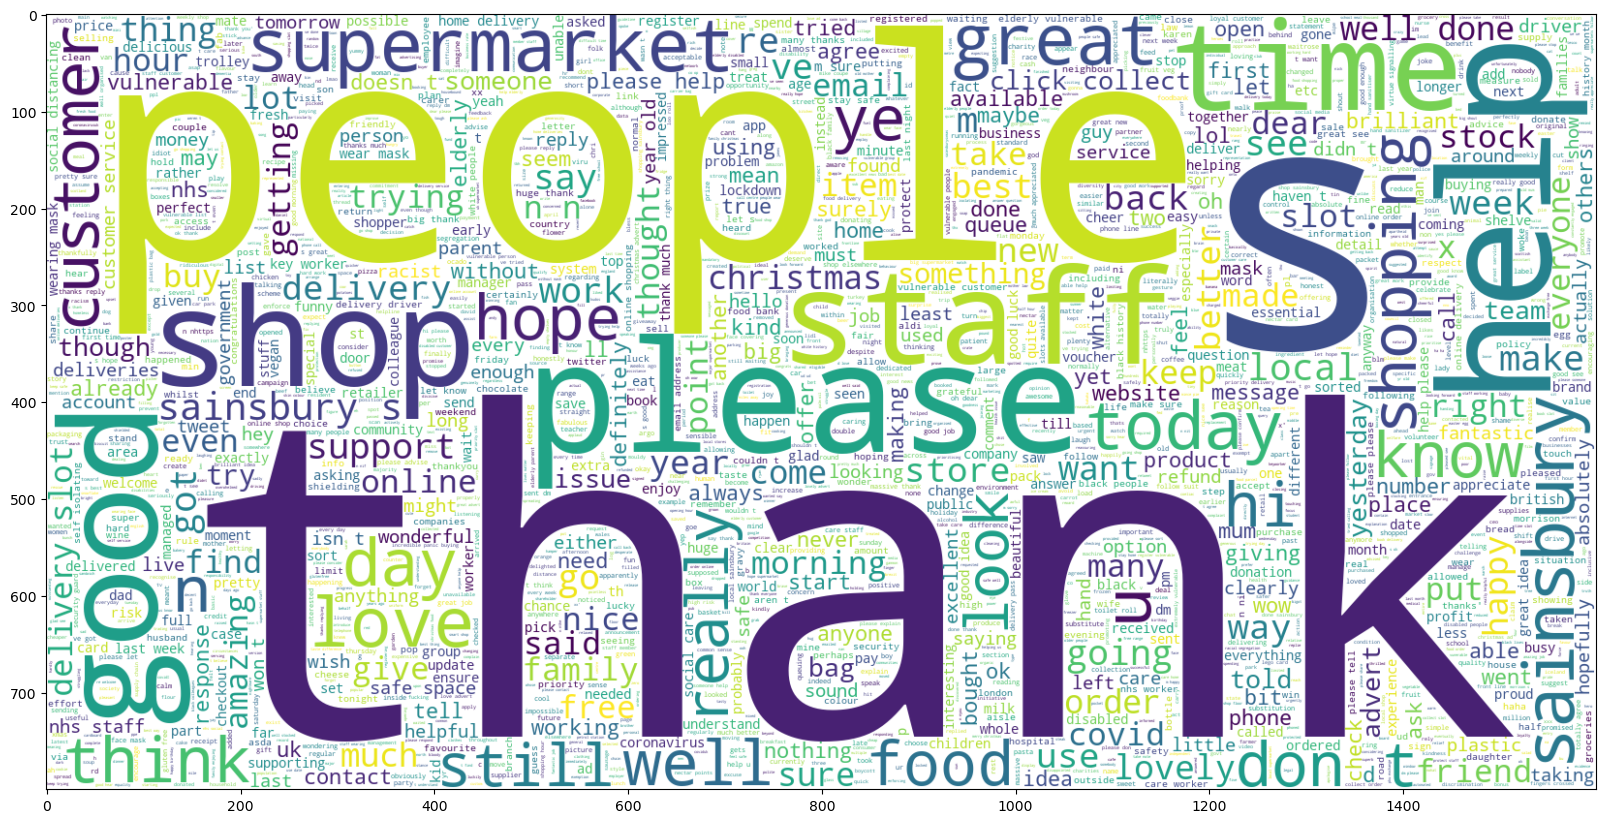

In [36]:
# wordcloud for positive text
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

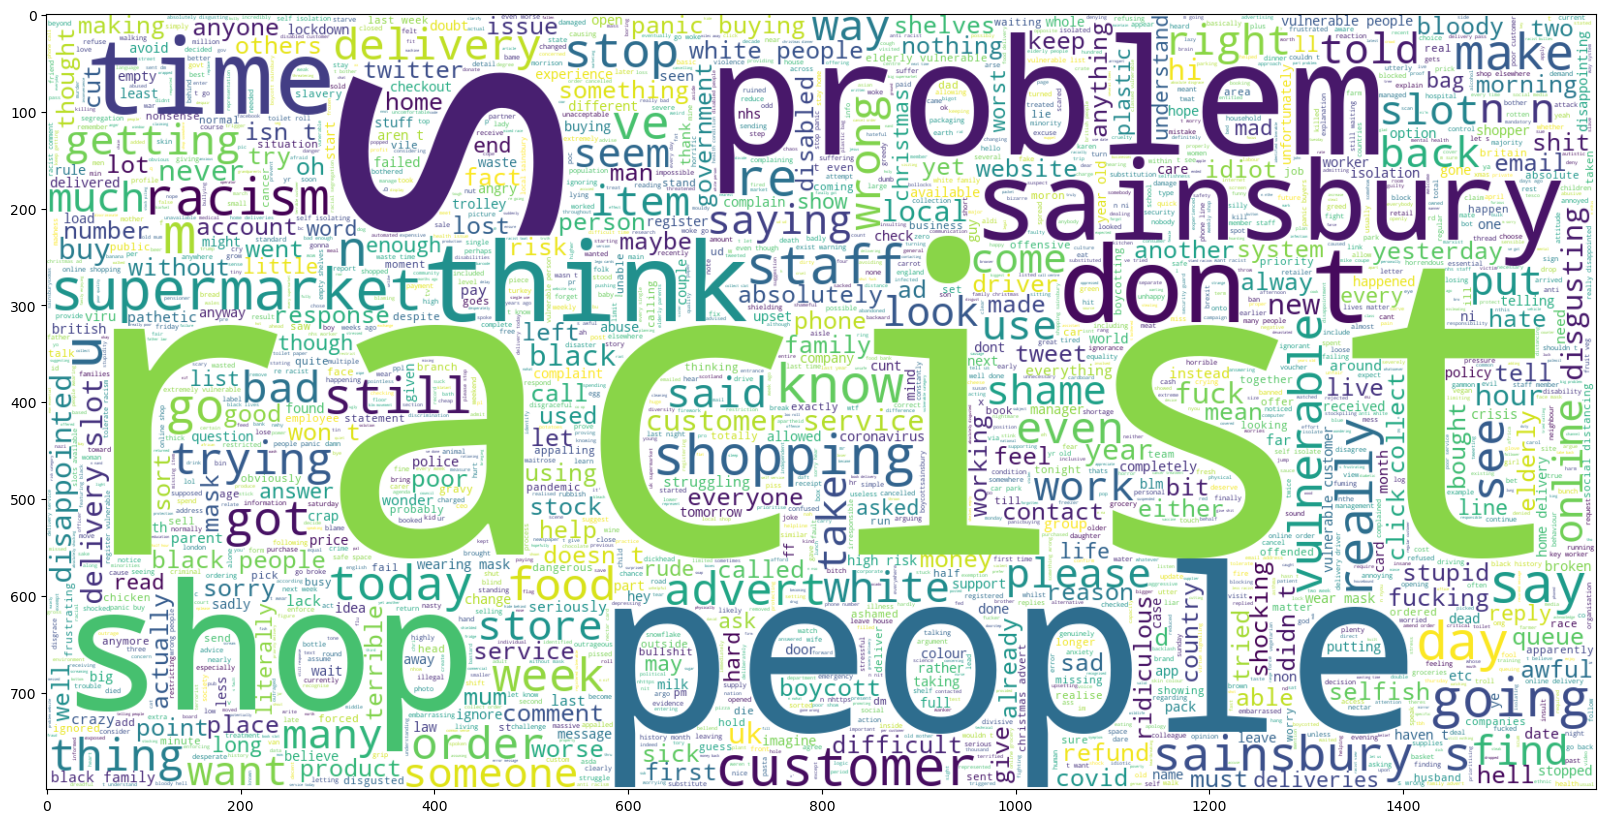

In [37]:
# wordcloud for negative text
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

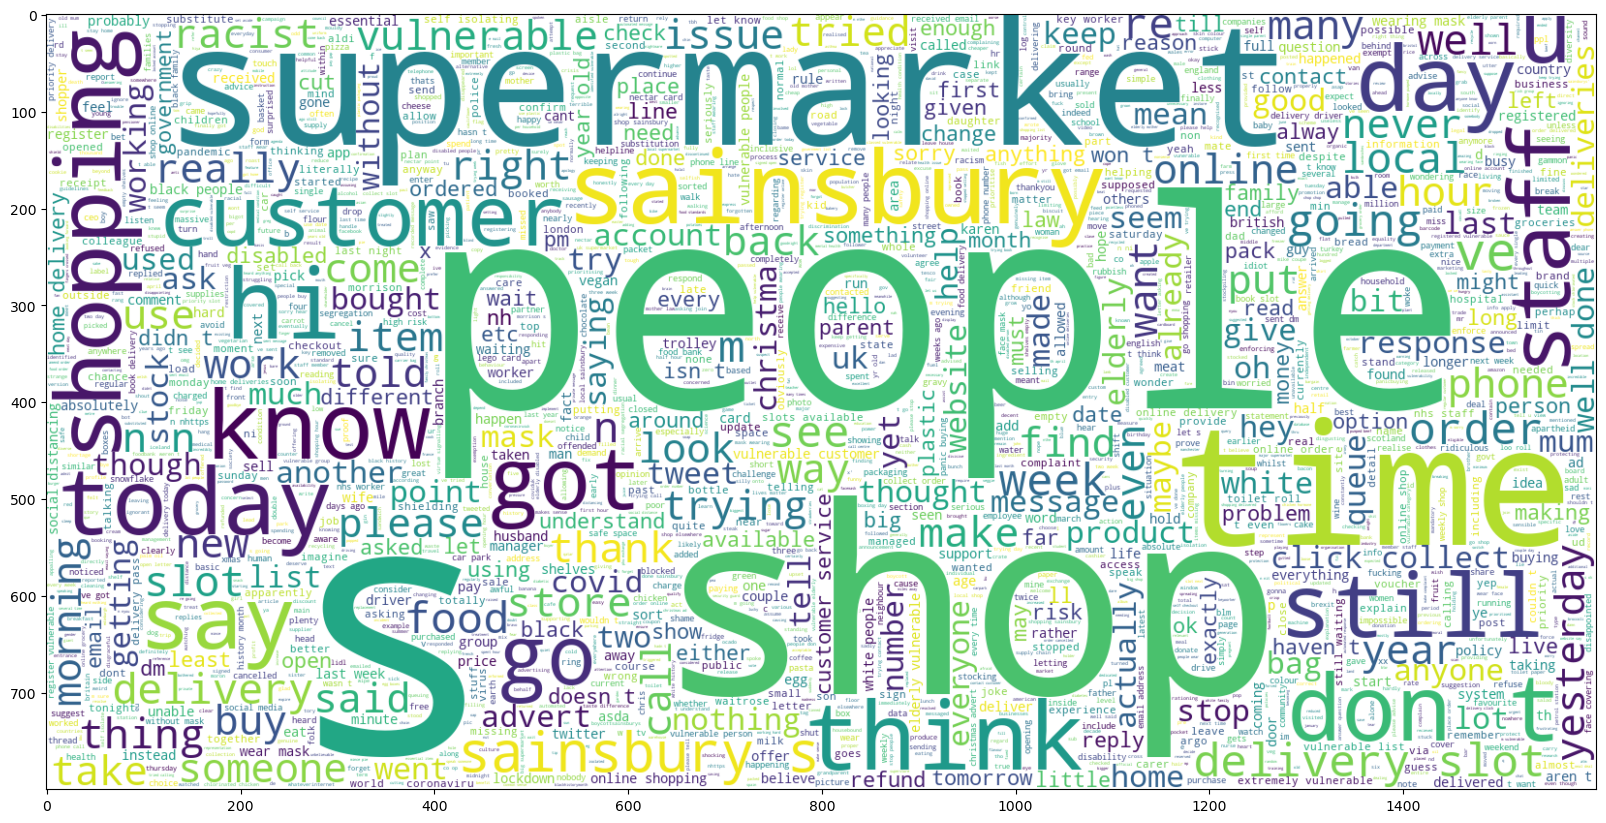

In [38]:
# wordcloud for neutral text
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'neutral'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

In [39]:
import pandas as pd
import unicodedata
import re
import contractions
import string
import gensim
import gensim.corpora as corpora

!pip install spacy
import spacy

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

In [40]:
df_1s=df[df['time'].dt.quarter==1]
df_2s=df[df['time'].dt.quarter==2]
df_3s=df[df['time'].dt.quarter==3]
df_4s=df[df['time'].dt.quarter==4]

In [41]:
#find the tokens of texts
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words
#storing the generated tokens in a new column named 'tokens'
df['tokens']=df.full_text.apply(generate_tokens)
df_1s['tokens']=df_1s.full_text.apply(generate_tokens)
df_2s['tokens']=df_2s.full_text.apply(generate_tokens)
df_3s['tokens']=df_3s.full_text.apply(generate_tokens)
df_4s['tokens']=df_4s.full_text.apply(generate_tokens)

/var/folders/4k/zlxq_x0j20l2h_h63bk5wskm0000gn/T/ipykernel_3986/924169540.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1s['tokens']=df_1s.full_text.apply(generate_tokens)
/var/folders/4k/zlxq_x0j20l2h_h63bk5wskm0000gn/T/ipykernel_3986/924169540.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2s['tokens']=df_2s.full_text.apply(generate_tokens)
/var/folders/4k/zlxq_x0j20l2h_h63bk5wskm0000gn/T/ipykernel_3986/924169540.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [42]:
df['tokens']

0        [today, collected, food, donated, shoppers, br...
1        [time, worked, together, get, list, vulnerable...
2        [dear, panic, buyers, please, use, humanity, l...
3                     [can’t, wait, see, brings, today, 🙈]
4        [sainsbury's, made, 'big', thing, website, hel...
                               ...                        
82812    [anything, done, check, social, distancing, lo...
82815    [person, delt, people, taping, starts, recordi...
82816    [i'm, say, i'm, elderly, can't, contact, get, ...
82817    [borders, opened, obviously, christmas, dinner...
82818                    [would, anyone, black, want, use]
Name: tokens, Length: 59234, dtype: object

In [108]:
# find the text with specific words
keyword = "staff"
filtered_df = df[df['full_text'].str.contains(keyword, case=False)]
filtered_df['full_text'].iloc[10]

"excellent news clarify “vulnerable” include prevent issues staff customers online slots made available disabled contact details know disability '"

In [45]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(df['tokens'])
id2word_1s=create_dictionary(df_1s['tokens'])
id2word_2s=create_dictionary(df_2s['tokens'])
id2word_3s=create_dictionary(df_3s['tokens'])
id2word_4s=create_dictionary(df_4s['tokens'])

In [46]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(df['tokens'],id2word)
corpus_1s=create_document_matrix(df_1s['tokens'],id2word_1s)
corpus_2s=create_document_matrix(df_2s['tokens'],id2word_2s)
corpus_3s=create_document_matrix(df_3s['tokens'],id2word_3s)
corpus_4s=create_document_matrix(df_4s['tokens'],id2word_4s)

In [82]:
#lda model for whole period in 2020
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                             )

In [89]:
#lda model for Q1 in 2020
lda_model_1s = gensim.models.ldamodel.LdaModel(corpus=corpus_1s,
                                            id2word=id2word_1s,
                                            num_topics=11,
                                            random_state=100,
                                             )

In [84]:
#lda model for Q2 in 2020
lda_model_2s = gensim.models.ldamodel.LdaModel(corpus=corpus_2s,
                                            id2word=id2word_2s,
                                            num_topics=10,
                                            random_state=100,
                                             )

In [85]:
#lda model for Q3 in 2020
lda_model_3s = gensim.models.ldamodel.LdaModel(corpus=corpus_3s,
                                            id2word=id2word_3s,
                                            num_topics=10,
                                            random_state=100,
                                             )

In [86]:
#lda model for Q4 in 2020
lda_model_4s = gensim.models.ldamodel.LdaModel(corpus=corpus_4s,
                                            id2word=id2word_4s,
                                            num_topics=10,
                                            random_state=100,
                                             )

In [87]:
#LDA model visualization for whole period in 2020
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.283127 -0.123601       1        1  17.249968
7     -0.097005 -0.005176       2        1  12.709186
3     -0.115682  0.297506       3        1  10.768432
2      0.127793 -0.016599       4        1  10.418181
0      0.348670 -0.108497       5        1   9.665737
6      0.290292  0.184562       6        1   9.591012
1      0.081007  0.278777       7        1   8.364651
8      0.116356 -0.302687       8        1   7.479831
4     -0.331180  0.141631       9        1   7.436652
9     -0.137123 -0.345915      10        1   6.316351, topic_info=             Term         Freq        Total Category  logprob  loglift
285      delivery  3529.000000  3529.000000  Default  30.0000  30.0000
212          well  1813.000000  1813.000000  Default  29.0000  29.0000
21     vulnerable  2291.000000  2291.000000  Default  28.0000  28.0000
14            get  5022.000000  5022.000000  Default  27.0000  27.0000
16         people  5000.000000  5000.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
947          asda   149.467052   231.051203  Topic10  -5.4584   2.3265
1870      another   176.005189   600.744881  Topic10  -5.2950   1.5344
245   supermarket   165.861529   730.718989  Topic10  -5.3544   1.2792
448           i'm   179.811639  1553.990005  Topic10  -5.2736   0.6054
244          shop   185.702996  2636.560732  Topic10  -5.2414   0.1089

[710 rows x 6 columns], token_table=      Topic      Freq Term
term                      
554       1  0.348493    "
554       2  0.077888    "
554       3  0.136193    "
554       4  0.135303    "
554       5  0.080558    "
...     ...       ...  ...
2239      3  0.007666    🙄
2239      6  0.981258    🙄
2239      9  0.007666    🙄
610       5  0.986790    🤣
610      10  0.009488    🤣

[1922 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 4, 3, 1, 7, 2, 9, 5, 10])

In [90]:
#LDA model visualization for Q1 in 2020
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_1s, corpus_1s, id2word_1s, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.042045 -0.121249       1        1  17.635306
7     -0.027613 -0.250826       2        1  13.434694
0     -0.181700 -0.028400       3        1  11.919432
10    -0.022144  0.077047       4        1  10.882794
5      0.137029 -0.246578       5        1   9.233080
1      0.264554 -0.041760       6        1   7.991803
8     -0.090441  0.287015       7        1   6.568234
9     -0.239093 -0.179616       8        1   6.456393
2     -0.259902  0.133230       9        1   5.863880
3      0.110747  0.231750      10        1   5.148067
4      0.266518  0.139388      11        1   4.866317, topic_info=           Term         Freq        Total Category  logprob  loglift
222    delivery  1527.000000  1527.000000  Default  30.0000  30.0000
13   vulnerable  1388.000000  1388.000000  Default  29.0000  29.0000
6           get  2180.000000  2180.000000  Default  28.0000  28.0000
700        well   551.000000   551.000000  Default  27.0000  27.0000
322         nhs   557.000000   557.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
468      toilet    50.622741   219.719651  Topic11  -5.0987   1.5549
273        work    56.544165   516.441389  Topic11  -4.9881   0.8109
718         new    45.873783   259.106298  Topic11  -5.1972   1.2915
11         time    46.054468   719.625869  Topic11  -5.1933   0.2739
257       years    39.482672   199.431685  Topic11  -5.3472   1.4032

[810 rows x 6 columns], token_table=      Topic      Freq Term
term                      
427       1  0.444770    "
427       2  0.116560    "
427       3  0.111959    "
427       4  0.090488    "
427       5  0.111959    "
...     ...       ...  ...
249       8  0.867022    😊
3854      5  0.963977    😡
1903      3  0.976545    🙄
196       3  0.022057    🤣
196       6  0.970518    🤣

[2439 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 1, 11, 6, 2, 9, 10, 3, 4, 5])

In [91]:
#LDA model visualization for Q2 period in 2020
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_2s, corpus_2s, id2word_2s, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.024330  0.014578       1        1  15.308508
5      0.009160 -0.123463       2        1  15.060026
9     -0.166873 -0.063049       3        1  13.399779
2     -0.096617  0.150417       4        1  10.600647
8      0.119311 -0.164784       5        1   9.621630
1      0.255677 -0.056675       6        1   9.242728
7      0.027120  0.218153       7        1   8.244078
0     -0.120627 -0.210926       8        1   6.772140
4     -0.244564  0.088529       9        1   6.423924
6      0.193083  0.147220      10        1   5.326541, topic_info=         Term        Freq        Total Category  logprob  loglift
46      thank  540.000000   540.000000  Default  30.0000  30.0000
73      order  488.000000   488.000000  Default  29.0000  29.0000
641   collect  354.000000   354.000000  Default  28.0000  28.0000
83   delivery  980.000000   980.000000  Default  27.0000  27.0000
640     click  307.000000   307.000000  Default  26.0000  26.0000
..        ...         ...          ...      ...      ...      ...
192   service   26.455163   233.223226  Topic10  -5.4435   0.7559
769   address   23.158880    95.491277  Topic10  -5.5766   1.5158
141     today   22.853440   409.151193  Topic10  -5.5899   0.0475
229   working   21.185204   160.218256  Topic10  -5.6657   0.9092
80          '   21.412307  1250.866410  Topic10  -5.6550  -1.1352

[758 rows x 6 columns], token_table=      Topic      Freq Term
term                      
239       1  0.217973    "
239       2  0.111408    "
239       3  0.191332    "
239       4  0.101721    "
239       5  0.050860    "
...     ...       ...  ...
499       1  0.029588    👍
499       7  0.917217    👍
4419      9  0.952300    😉
5448      6  0.937329    🙈
4807      7  0.937088    🤣

[2200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 10, 3, 9, 2, 8, 1, 5, 7])

In [92]:
#LDA model visualization for Q3 period in 2020
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_3s, corpus_3s, id2word_3s, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.029808  0.046726       1        1  15.154751
4      0.025572 -0.223446       2        1  13.982570
6     -0.139759 -0.073094       3        1  11.267311
0     -0.100897  0.141028       4        1  11.137583
3      0.159524 -0.173213       5        1  10.778575
7      0.197898 -0.010191       6        1  10.610729
2      0.028455  0.265534       7        1   7.241461
5     -0.161437 -0.197472       8        1   6.948849
8     -0.239820  0.075624       9        1   6.769092
1      0.200657  0.148505      10        1   6.109078, topic_info=        Term        Freq       Total Category  logprob  loglift
125     mask  572.000000  572.000000  Default  30.0000  30.0000
26      wear  447.000000  447.000000  Default  29.0000  29.0000
371  plastic  187.000000  187.000000  Default  28.0000  28.0000
160    masks  419.000000  419.000000  Default  27.0000  27.0000
118   people  687.000000  687.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
222        £   20.566790  140.784594  Topic10  -5.5071   0.8718
556     week   20.408403  144.521434  Topic10  -5.5148   0.8379
27         '   21.321665  819.319477  Topic10  -5.4711  -0.8534
785     last   19.552788  185.348939  Topic10  -5.5577   0.5463
82     local   19.402294  177.993179  Topic10  -5.5654   0.5790

[745 rows x 6 columns], token_table=      Topic      Freq Term
term                      
646       1  0.092902    "
646       2  0.287152    "
646       3  0.112609    "
646       4  0.132315    "
646       5  0.157652    "
...     ...       ...  ...
886       4  0.935842   😂'
3211      3  0.034609    😊
3211      8  0.934440    😊
4451     10  0.949889    🙂
4373      6  0.973457    🤣

[2067 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 7, 1, 4, 8, 3, 6, 9, 2])

In [93]:
#LDA model visualization for Q4 in 2020
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_4s, corpus_4s, id2word_4s, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.095863  0.275129       1        1  17.275949
2      0.115087 -0.180542       2        1  11.783828
7      0.099930  0.245451       3        1  11.086892
1     -0.153996 -0.157222       4        1   9.628279
9     -0.194167  0.110282       5        1   9.305072
8      0.025433  0.046443       6        1   8.983870
0      0.289220 -0.094197       7        1   8.849163
3     -0.308466 -0.030626       8        1   8.479247
4      0.256788  0.107013       9        1   7.501142
5     -0.033966 -0.321733      10        1   7.106557, topic_info=        Term         Freq        Total Category  logprob  loglift
142    black  1161.000000  1161.000000  Default  30.0000  30.0000
140   advert   792.000000   792.000000  Default  29.0000  29.0000
743    white  1093.000000  1093.000000  Default  28.0000  28.0000
389     love   497.000000   497.000000  Default  27.0000  27.0000
92      well   697.000000   697.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
261      let    58.663408   169.882326  Topic10  -5.4242   1.5809
26      i've    60.178797   223.717350  Topic10  -5.3987   1.3311
613    happy    57.857322   194.868411  Topic10  -5.4380   1.4298
135  nothing    56.535041   218.820362  Topic10  -5.4611   1.2908
420    would    59.812296   843.306655  Topic10  -5.4048  -0.0020

[737 rows x 6 columns], token_table=      Topic      Freq Term
term                      
268       1  0.151073    "
268       2  0.049511    "
268       3  0.239939    "
268       4  0.195506    "
268       5  0.035546    "
...     ...       ...  ...
1127      7  0.010885    🤔
621       1  0.008919    🤣
621       6  0.008919    🤣
621       7  0.035676    🤣
621      10  0.936484    🤣

[2149 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 8, 2, 10, 9, 1, 4, 5, 6])